<a href="https://colab.research.google.com/github/raghurammanikanta/WORK-ON-TELUGU-DATA/blob/main/EDA_for_news_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing the libraries we need***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# ***Loading the dataset***

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TELUGU_NEWS_TEST.csv.zip')
df.head()

,SNo,date,heading,body,topic
0,7771,19-05-2017 13:44:10,కేశవ,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment
1,9591,01-08-2017 13:58:24,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment
2,12622,05-04-2017 00:31:58,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation
3,16401,30-08-2017 03:34:37,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation
4,10422,10-04-2017 09:00:48,ఏయ్ జయప్రకాష్ అనే కేక వినిపించింది.. వెనక్కి త...,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment


In [ ]:
df['topic'] = df['topic'].apply(lambda x: x if x in ['entertainment', 'nation'] else 'others')

In [ ]:
c=df['topic'].value_counts()
c

topic
nation           1673
others           1367
entertainment    1289
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SNo      4329 non-null   int64 
 1   date     4329 non-null   object
 2   heading  4329 non-null   object
 3   body     4329 non-null   object
 4   topic    4329 non-null   object
dtypes: int64(1), object(4)
memory usage: 169.2+ KB


In [ ]:
df.describe()

,SNo
count,4329.000000
mean,10696.929545
std,6226.476364
min,10.000000
25%,5195.000000
50%,10655.000000
75%,16091.000000
max,21640.000000


# ***Analyze the distribution of emotions:***

<ipython-input-5-06b6c7d816a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=df, palette='viridis')


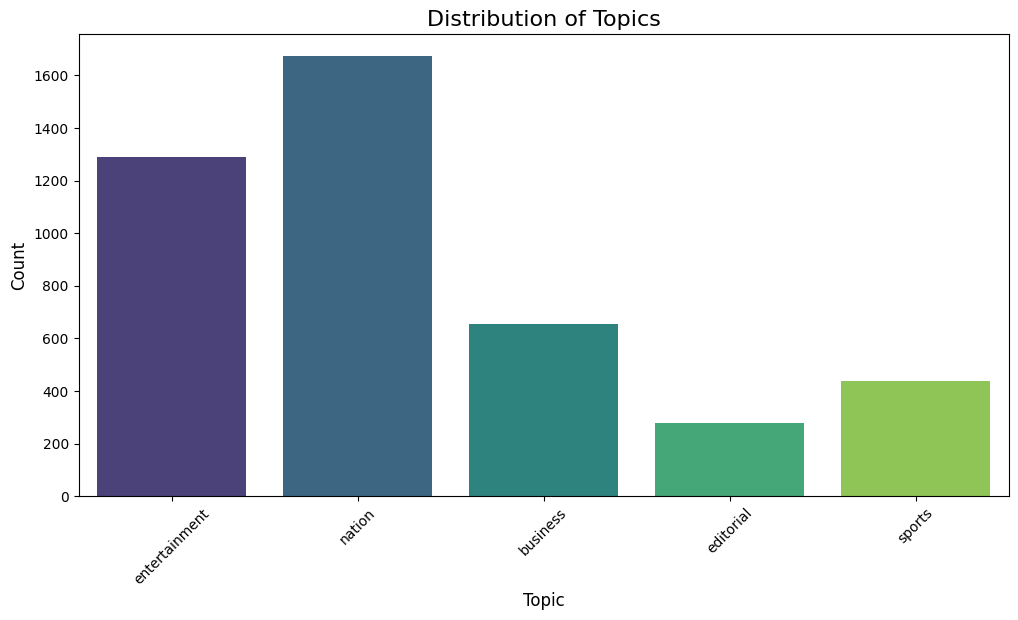

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='topic', data=df, palette='viridis')
plt.title('Distribution of Topics', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('Distribution of Topics',dpi=1200,bbox_inches='tight')
plt.show()

# ***Analyze text length***

In [ ]:
length_stats = df['text_length'].describe()
print("Text Length Statistics:")
print(length_stats)

Text Length Statistics:
count     4329.000000
mean      1428.280434
std       2131.990674
min         11.000000
25%        629.000000
50%        912.000000
75%       1355.000000
max      51826.000000
Name: text_length, dtype: float64


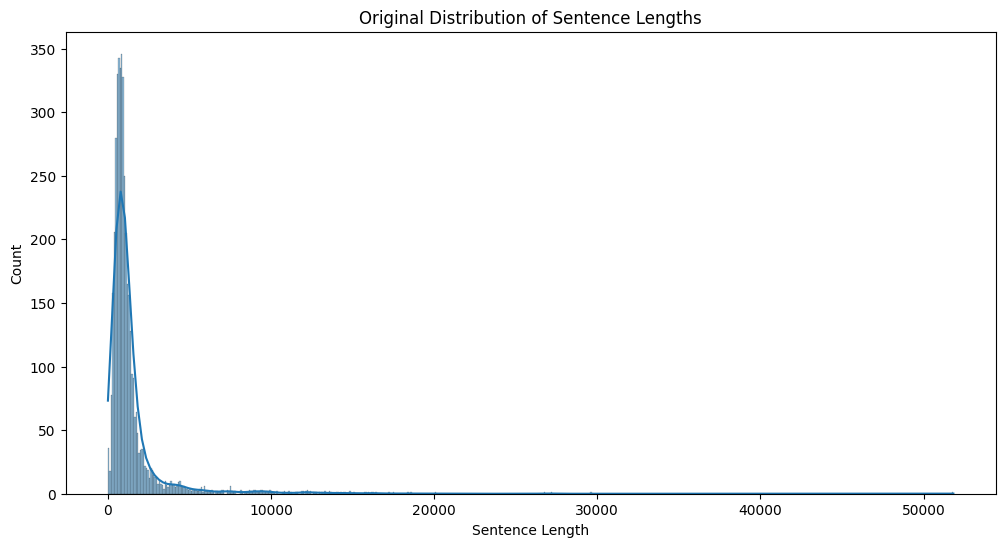

count     4329.000000
mean      1428.280434
std       2131.990674
min         11.000000
25%        629.000000
50%        912.000000
75%       1355.000000
max      51826.000000
Name: text_length, dtype: float64


In [ ]:

df['text_length'] = df['body'].str.len()


# Plot the original distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', kde=True)
plt.title('Original Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.savefig('Original Distribution of Sentence Lengths.png',dpi=1200,bbox_inches='tight')
plt.show()

# Get some statistics
print(df['text_length'].describe())



In [ ]:
cutoff = df['text_length'].quantile(0.90)
print(f"95th percentile of sentence length: {cutoff}")

95th percentile of sentence length: 2404.2000000000016


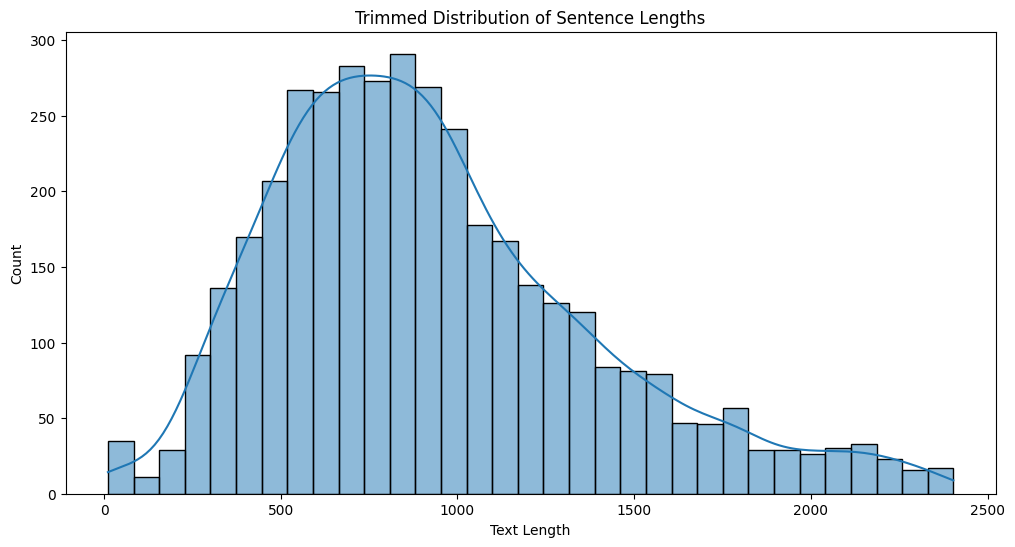

count    3896.000000
mean      928.214322
std       458.682881
min        11.000000
25%       597.000000
50%       853.000000
75%      1177.000000
max      2403.000000
Name: text_length, dtype: float64


In [ ]:
df_trimmed = df[df['text_length'] <= cutoff].copy()

# Plot the new distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df_trimmed, x='text_length', kde=True)
plt.title('Trimmed Distribution of Sentence Lengths')
plt.xlabel('Text Length')
plt.savefig('Trimmed Distribution of Sentence Lengths.png',dpi=1200,bbox_inches='tight')
plt.show()

# Get some statistics of the trimmed data
print(df_trimmed['text_length'].describe())

In [ ]:
df_trimmed.to_csv('trimmed_dataset22.csv', index=False)

In [ ]:
da=pd.read_csv('//content/trimmed_dataset22.csv')
da.head()

,SNo,date,heading,body,topic,text_length
0,9591,01-08-2017 13:58:24,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment,1536
1,12622,05-04-2017 00:31:58,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation,431
2,16401,30-08-2017 03:34:37,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation,1141
3,14159,16-04-2017 11:55:49,నా భార్య నన్ను టార్గెట్ చేస్తోంది : కేజ్రీవాల్,\nన్యూఢిల్లీ : ఆప్ సీనియర్ నేత కుమార్ విశ్వాస్...,nation,607
4,8328,23-09-2017 11:11:30,బిగ్ బాస్ హౌస్‌లోకి బడా హీరో..!,70రోజులు.. 60 కెమెరాల మధ్య.. 14 మంది కంటెస్టెం...,entertainment,1183


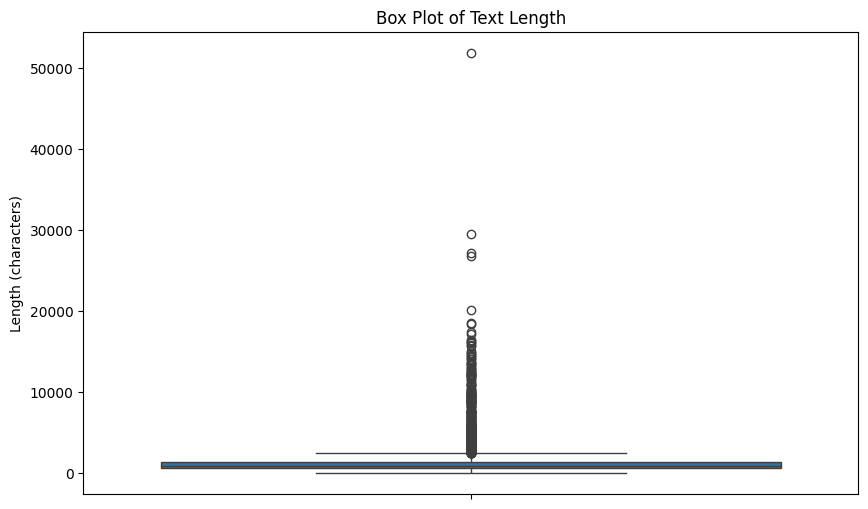

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['text_length'])
plt.title('Box Plot of Text Length')
plt.ylabel('Length (characters)')
plt.savefig('Box Plot of Text Length.png',dpi=1200,bbox_inches='tight')
plt.show()

In [ ]:
print("\nTop 10 Longest Texts:")
print(df.nlargest(10, 'text_length')[['body', 'text_length']])


Top 10 Longest Texts:
                                                   body  text_length
2551  హిందువులైనా, ముస్లింలైనా, మరొకరైనా భార్యలను అన...        51826
18    ఆర్కే కొత్తపలుకు  గుంపుస్వామ్యంలో పడి ప్రజలు క...        29574
3022  పునర్జన్మ పొందిన ‘ఆంధ్రజ్యోతి’ 15 సంవత్సరాలు ప...        27169
2739  అమెరికాలో మనవాళ్ల పరిస్థితి ఏమిటి? అమెరికా వెళ...        26780
2856  దేశవ్యాప్తంగా న్యూ పెన్షన్‌ స్కీం పరిధిలోకి వచ...        20120
3509  కుల కేంద్రితంగా కాకుండా వెనుకబాటుతనాన్ని వాస్త...        18575
872   దశాబ్దాలుగా కాగితాలకే పరిమితమైన దేశంలోనే అతిపె...        18428
678                                  చిన్నవయసులోని వ...        17472
3094  గురజాడ సాహిత్య భావజాలాన్ని, వచనకవిత్వానికి ఆద్...        17220
3534  1977 నవంబర్ 19న ఆంధ్రప్రదేశ్‌ కోస్తా తీరంలో సం...        16444


In [ ]:
print("\nTop 10 Shortest Texts:")
print(df.nsmallest(10, 'text_length')[['body', 'text_length']])


Top 10 Shortest Texts:
                         body  text_length
1359             \n- శాంతివనం           11
173             \n- కలిమిశ్రీ           12
210             \n- రిషికపూర్           12
1622        \n - బిక్కి కృష్ణ           16
2059         భద్రతకు పెద్దపీట           17
2570       తయారీ రంగం వెనుకంజ           19
2770   \nరూ. 25 వేలు స్వాధీనం           21
2393  \n- కందుకూరి శ్రీరాములు           22
3495   - లాలూ ప్రసాద్‌ యాదవ్‌           22
659    రామ్‌దేవ్‌తో యోగి భేటీ           23


In [ ]:
#for original
import pandas as pd
import re
from collections import Counter

try:
    # Load your data (replace with the actual path to your file)
    file_path = '/content/drive/MyDrive/TELUGU_NEWS_TEST.csv.zip'
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")

    # Print column names
    print("Available columns in your dataset:")
    print(df.columns.tolist())

    # Ask user for the correct column name
    column_name = input("Please enter the name of the column containing Telugu sentences: ")

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the dataset.")

    # Function to split sentences into words
    def split_sentence(sentence):
        if isinstance(sentence, str):
            return re.findall(r'\S+', sentence)
        return []

    # Split sentences and count word frequencies
    all_words = []
    for sentence in df[column_name]:
        all_words.extend(split_sentence(sentence))

    word_counts = Counter(all_words).most_common(20)  # Top 20 words
    print("Word counts calculated.")

    # Print the top 20 words and their counts
    print("\nTop 20 words and their frequencies:")
    max_word_length = max(len(word) for word, _ in word_counts)
    max_count = max(count for _, count in word_counts)

    for word, count in word_counts:
        bar = '#' * int(count * 50 / max_count)
        print(f"{word.ljust(max_word_length)} | {str(count).rjust(5)} | {bar}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

print("Script completed.")


Data loaded successfully.
Available columns in your dataset:
['SNo', 'date', 'heading', 'body', 'topic']
Please enter the name of the column containing Telugu sentences: body
Word counts calculated.

Top 20 words and their frequencies:
ఈ         |  9794 | ##################################################
కూడా      |  4153 | #####################
ఆ         |  3897 | ###################
నుంచి     |  3076 | ###############
ఆయన       |  2519 | ############
అని       |  2317 | ###########
సినిమా    |  2089 | ##########
తన        |  2014 | ##########
ఒక        |  1799 | #########
ఓ         |  1653 | ########
చేశారు.   |  1603 | ########
అయితే     |  1547 | #######
కోసం      |  1539 | #######
ఉన్న      |  1533 | #######
ప్రభుత్వం |  1321 | ######
చేసిన     |  1259 | ######
తర్వాత    |  1180 | ######
శాతం      |  1175 | #####
కోట్ల     |  1175 | #####
తమ        |  1147 | #####
Script completed.


In [ ]:
#for truncated
import pandas as pd
import re
from collections import Counter

try:
    # Load your data (replace with the actual path to your file)
    file_path = '//content/trimmed_dataset22.csv'
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")

    # Print column names
    print("Available columns in your dataset:")
    print(df.columns.tolist())

    # Ask user for the correct column name
    column_name = input("Please enter the name of the column containing Telugu sentences: ")

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the dataset.")

    # Function to split sentences into words
    def split_sentence(sentence):
        if isinstance(sentence, str):
            return re.findall(r'\S+', sentence)
        return []

    # Split sentences and count word frequencies
    all_words = []
    for sentence in df[column_name]:
        all_words.extend(split_sentence(sentence))

    word_counts = Counter(all_words).most_common(20)  # Top 20 words
    print("Word counts calculated.")

    # Print the top 20 words and their counts
    print("\nTop 20 words and their frequencies:")
    max_word_length = max(len(word) for word, _ in word_counts)
    max_count = max(count for _, count in word_counts)

    for word, count in word_counts:
        bar = '#' * int(count * 50 / max_count)
        print(f"{word.ljust(max_word_length)} | {str(count).rjust(5)} | {bar}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

print("Script completed.")


Data loaded successfully.
Available columns in your dataset:
['SNo', 'date', 'heading', 'body', 'topic', 'text_length']
Please enter the name of the column containing Telugu sentences: body
Word counts calculated.

Top 20 words and their frequencies:
ఈ         |  6795 | ##################################################
కూడా      |  2289 | ################
ఆ         |  2212 | ################
నుంచి     |  1847 | #############
సినిమా    |  1760 | ############
ఆయన       |  1535 | ###########
అని       |  1404 | ##########
ఓ         |  1365 | ##########
తన        |  1348 | #########
చేశారు.   |  1255 | #########
అయితే     |  1025 | #######
తెలిపారు. |  1011 | #######
కోసం      |   986 | #######
చెప్పారు. |   958 | #######
ఉన్న      |   844 | ######
చేసిన     |   828 | ######
కోట్ల     |   788 | #####
తర్వాత    |   763 | #####
మరో       |   713 | #####
చేసింది.  |   687 | #####
Script completed.
